## Linear Regression on Boston HousingDataset

### CASE STUDY - 1

#### 1) Import the required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# science kit library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# evaluation metrics for checking which giving better output 
# metrics through checking the which will give better output close one's
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# warnings ignore
import warnings
warnings.filterwarnings('ignore')

2) Load the Housing DataSet

In [2]:
data=pd.read_csv('Desktop\HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#### The details of data
1] CRIM - per capita crime rate by town

2] ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

3] INDUS - proportion of non-retail business acres per town.

4] CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5] NOX - nitric oxides concentration (parts per 10 million)

6] RM - average number of rooms per dwelling

7] AGE - proportion of owner-occupied units built prior to 1940

8] DIS - weighted distances to five Boston employment centres

9] RAD - index of accessibility to radial highways

10] TAX - full-value property-tax rate per $10,000

11] PTRATIO - pupil-teacher ratio by town

12] B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13] LSTAT - % lower status of the population

14] MEDV - Median value of owner-occupied homes in $1000's

#### 3) Load the data into pandas dataframe

In [3]:
df=pd.DataFrame(data)

#### 4) The target values is missing from the data. Create a new column of target values and add it to dataframe

In [4]:
df['target_values']=np.zeros(506)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target_values
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4,0.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0.0


#### 5) check for missing values in all the columns

In [5]:
# find the number of empty value in dataset
print(df.isna().sum())

#convert the empty value into 0
df=df.fillna(0)

# check null or empty value get converted into 0 or not 
print(df.isna().sum())

CRIM             20
ZN               20
INDUS            20
CHAS             20
NOX               0
RM                0
AGE              20
DIS               0
RAD               0
TAX               0
PTRATIO           0
B                 0
LSTAT            20
MEDV              0
target_values     0
dtype: int64
CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
target_values    0
dtype: int64


#### 6) Data Visualization for MEDV feature

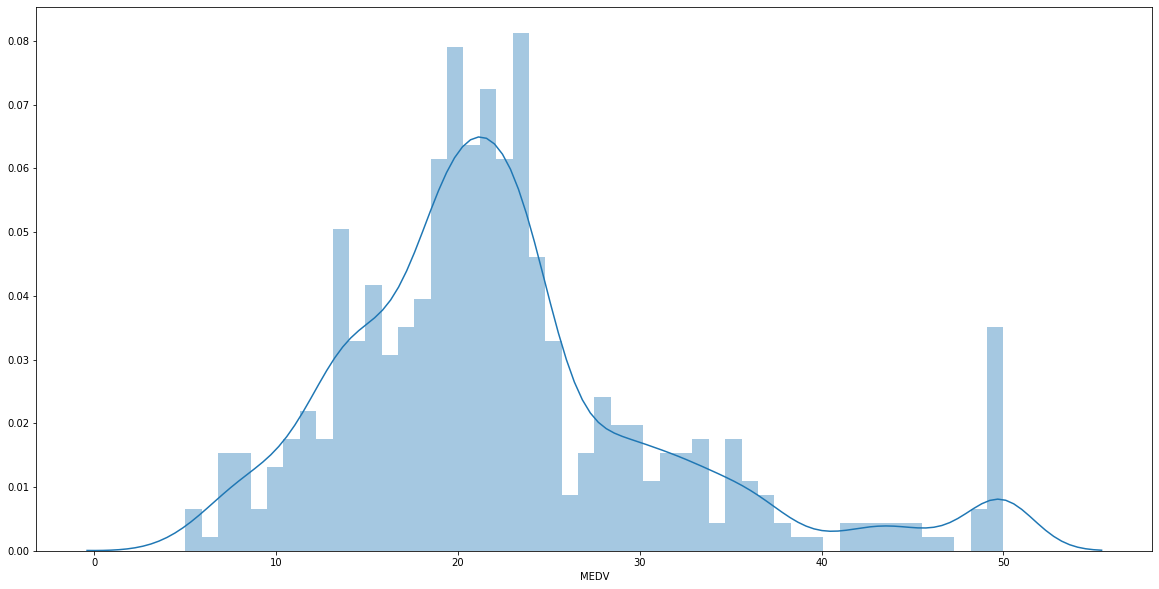

In [6]:
plt.figure(figsize=(20,10))
sns.distplot(df['MEDV'],bins=50)
plt.show()

#### 7) compute the pair wise correlation for all columns  

In [7]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target_values
CRIM,1.000000,-0.185559,0.379772,-0.055713,0.410918,-0.220340,0.328997,-0.365901,0.600505,0.559880,0.278243,-0.364886,0.411330,-0.384120,NaN
ZN,-0.185559,1.000000,-0.482670,-0.032992,-0.498619,0.312295,-0.470146,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.361012,0.362292,NaN
INDUS,0.379772,-0.482670,1.000000,0.055833,0.690250,-0.339054,0.488737,-0.662476,0.564867,0.687468,0.372852,-0.341514,0.492359,-0.441371,NaN
CHAS,-0.055713,-0.032992,0.055833,1.000000,0.070867,0.106797,0.054485,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.040427,0.183844,NaN
NOX,0.410918,-0.498619,0.690250,0.070867,1.000000,-0.302188,0.627476,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.549209,-0.427321,NaN
RM,-0.220340,0.312295,-0.339054,0.106797,-0.302188,1.000000,-0.227535,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.584754,0.695360,NaN
AGE,0.328997,-0.470146,0.488737,0.054485,0.627476,-0.227535,1.000000,-0.641898,0.420382,0.459859,0.239508,-0.214615,0.503452,-0.356699,NaN
DIS,-0.365901,0.632428,-0.662476,-0.092318,-0.769230,0.205246,-0.641898,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.456922,0.249929,NaN
RAD,0.600505,-0.300061,0.564867,-0.003339,0.611441,-0.209847,0.420382,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.438134,-0.381626,NaN
TAX,0.559880,-0.304385,0.687468,-0.035822,0.668023,-0.292048,0.459859,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.494026,-0.468536,NaN


#### 8)use the heatmap function from seaborn to plot the correlation matrix

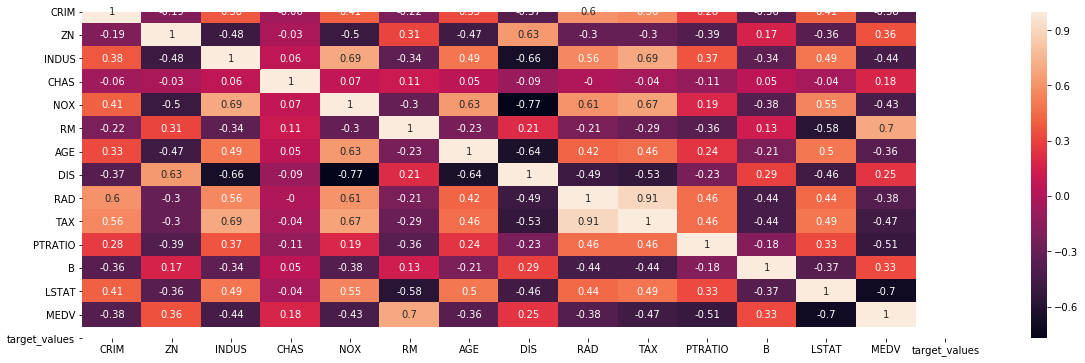

In [8]:
plt.figure(figsize=(20,6))
cor_matrix=df.corr().round(2)
sns.heatmap(data=cor_matrix,annot=True)
plt.show()

### 9) Observations
1] From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM    

2] RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

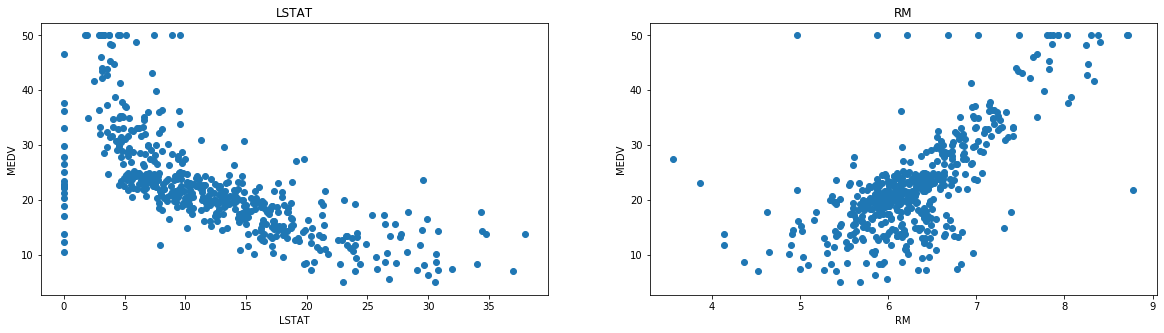

In [9]:
plt.figure(figsize=(20,5))
features = ['LSTAT','RM']
target = df['MEDV']
for i ,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    
    x = df[col]
    
    y=target
    
    plt.scatter(x,y)
    
    plt.title(col)
    
    plt.xlabel(col)
    
    plt.ylabel('MEDV')

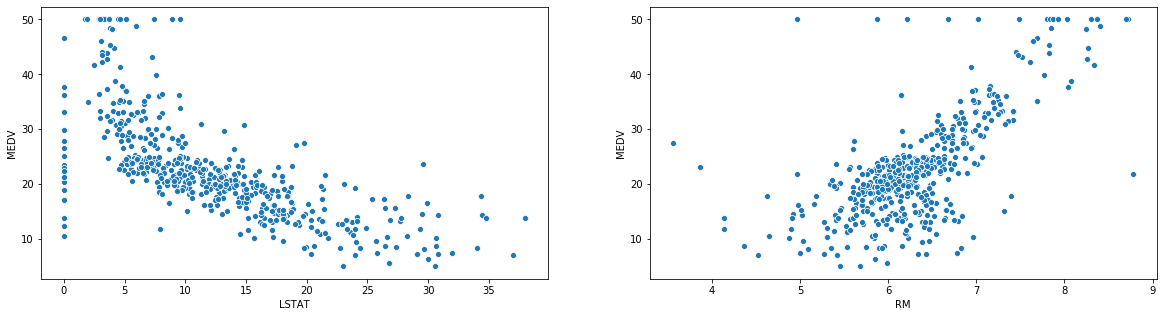

In [10]:
# x=df['LSATAT','RM']
# Y=df['MEDV']
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(data=df.corr(),x=df['LSTAT'],y=df['MEDV'],ax=axes[0],marker='o')
sns.scatterplot(data=df.corr(),x=df['RM'],y=df['MEDV'],ax=axes[1])
plt.show()

In [14]:
x_trn=df[['LSTAT','RM']]
y=df['MEDV']
x_train,x_test,y_train,y_test=train_test_split(x_trn,y,random_state=1,test_size=0.1)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 11) Calculate RMSE & R2 score 

In [20]:
# model evolution for testing set
y_pred=lr.predict(x_test)
print(lr.intercept_)
print(lr.coef_)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

-5.514264589388798
[-0.54983877  5.54432399]
5.632608411948523
0.65815432841888


#### 12) observe Ytest & ypred using scatter plot 

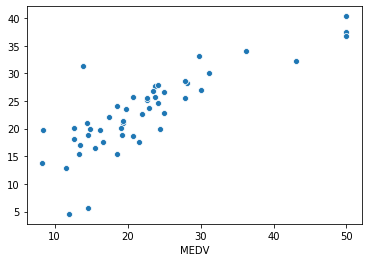

In [21]:
sns.scatterplot(data=df.corr(),x=y_test,y=y_pred)
plt.show()

#### model evolution for training set

In [24]:
y_pred=lr.predict(x_train)
print(lr.intercept_)
print(lr.coef_)
print(np.sqrt(mean_squared_error(y_train,y_pred)))
print(r2_score(y_train,y_pred))

-5.514264589388798
[-0.54983877  5.54432399]
5.749423876676486
0.6040031956464276


#### The result of using multiple linear regression is not giving the best fit model 


#### do it using Polynomial regression with degree 2 which is giving me best fit output

In [25]:
from sklearn.preprocessing import PolynomialFeatures
pf= PolynomialFeatures(2)
x_poly=pf.fit_transform(x_trn)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=1,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2 score is',r2_score(y_test,y_pred))
print('mean squared error',mean_squared_error(y_test,y_pred))

r2 score is 0.8002341258437604
mean squared error 18.309438736232977
